<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Bayesian_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are 2 approaches to probability,



*   Frequentist (parameter is treated as constant)
*   Bayesian (parameter treated as a distribution)





## Bayes' Rule Formula

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

## Explanation of Terms

- $P(A|B)$: The conditional probability of event $A$ occurring given that event $B$ has occurred (posterior probability).
- $P(B|A)$: The conditional probability of event $B$ occurring given that event $A$ has occurred (likelihood).
- $P(A)$: The probability of event $A$ occurring (prior probability).
- $P(B)$: The probability of event $B$ occurring (evidence or marginal likelihood).

## Example Application

Suppose you want to calculate the probability of having a disease ($D$) given a positive test result ($T$):

$P(D|T) = \frac{P(T|D) \cdot P(D)}{P(T)}$

Where:
- $P(T|D)$: Probability of testing positive given the disease.
- $P(D)$: Probability of having the disease.
- $P(T)$: Total probability of testing positive.

# Frequentist Approach

We did MOM, using moments, CLT to find parameters using algebric manipulation

In MLE, we used likelihood function and used calculus function to maximize it

In beginning we didnt assume any prior parameter value, it was calculated as a final value for once and for all

# Bayesian Estimation

Bayesian Terms





**Posterior Probability ($P(A|B)$)**: The probability of event $A$ (the hypothesis) given that event $B$ (the evidence) has occurred. This is the updated probability after considering the new evidence.



**Likelihood ($P(B|A)$)**: The probability of observing the evidence $B$ given that the hypothesis $A$ is true. It measures how well the hypothesis explains the observed data.



**Prior Probability ($P(A)$)**: The initial probability of the hypothesis $A$ before observing the evidence $B$. It reflects prior knowledge or belief about the hypothesis.



**Marginal Likelihood ($P(B)$)**: The total probability of observing the evidence $B$ under all possible hypotheses. It acts as a normalizing constant in Bayes' Rule, ensuring the posterior probabilities sum to 1.

Consider calculating the probability of having a disease ($D$) given a positive test result ($T$):

$P(D|T) = \frac{P(T|D) \cdot P(D)}{P(T)}$

Where:





$P(D|T)$: Posterior probability of having the disease given a positive test.



$P(T|D)$: Likelihood of a positive test given the disease.



$P(D)$: Prior probability of having the disease.



$P(T)$: Marginal likelihood of a positive test, often computed as $P(T) = P(T|D) \cdot P(D) + P(T|\neg D) \cdot P(\neg D)$.



Let's see an example:-

We will generate 10 samples of bernoulli and try to estimate p using bayesian updating

In [2]:
import numpy as np

# Generate 10 Bernoulli trials with p=0.4
bernoulli_trials = np.random.binomial(n=1, p=0.4, size=10).tolist()

# Display the results
print(bernoulli_trials)

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]


Now since parameters have distributions, we will have out p as follows

P = {3,4,5}

equally likely, each parameter has probability 1/3, and has its own prior probability based on individual parameter value

In [6]:
# Define the prior distribution for the parameter p
# The possible values for p are 0.3, 0.4, and 0.5, each with a probability of 1/3
prior_p = [0.3, 0.4, 0.5]
prior_prob = [1/3, 1/3, 1/3]

bernoulli_trials = np.random.binomial(n=1, p=0.4, size=10).tolist()
#recalculated samples using theoretical parameter value for further baeysian updating rounds

# Calculate the likelihood of the observed data for each prior value of p
# The likelihood for a Bernoulli distribution is p^k * (1-p)^(n-k), where k is the number of successes and n is the number of trials
num_successes = sum(bernoulli_trials)
num_trials = len(bernoulli_trials)

likelihood = []
for p in prior_p:
    # Calculate the likelihood P(S | p)
    likelihood_p = (p ** num_successes) * ((1 - p) ** (num_trials - num_successes))
    likelihood.append(likelihood_p)

# Calculate the joint probability P(S and p) = P(S | p) * P(p)
joint_prob = [likelihood[i] * prior_prob[i] for i in range(len(prior_p))]

# Calculate the marginal likelihood P(S)
# P(S) = sum(P(S and p)) over all possible values of p
marginal_likelihood = sum(joint_prob)

# Calculate the posterior probability P(p | S) = P(S and p) / P(S)
posterior_prob = [joint_prob[i] / marginal_likelihood for i in range(len(prior_p))]

# Calculate the Maximum A Posteriori (MAP) estimator
# The MAP estimate is the value of p with the highest posterior probability
map_estimate = prior_p[np.argmax(posterior_prob)]

# Calculate the conditional expected value of p given S
# E[p | S] = sum(p * P(p | S)) over all possible values of p
conditional_expected_value = sum([prior_p[i] * posterior_prob[i] for i in range(len(prior_p))])

# Display the results
print("Prior probabilities:", prior_prob)
print("Likelihoods P(S | p):", likelihood)
print("Joint probabilities P(S and p):", joint_prob)
print("Marginal likelihood P(S):", marginal_likelihood)
print("Posterior probabilities P(p | S):", posterior_prob)
print("MAP estimate of p:", map_estimate)
print("Conditional expected value of p:", conditional_expected_value)

Prior probabilities: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Likelihoods P(S | p): [0.00017503289999999991, 0.0005308416000000002, 0.0009765625]
Joint probabilities P(S and p): [5.834429999999997e-05, 0.00017694720000000007, 0.0003255208333333333]
Marginal likelihood P(S): 0.0005608123333333333
Posterior probabilities P(p | S): [0.10403533683579232, 0.3155194518427734, 0.5804452113214343]
MAP estimate of p: 0.5
Conditional expected value of p: 0.44764098744856423


Considering our p was 0.4, it gave very close values to it

Bayesian inference has asymptotic convergence properties. As the number of observations becomes large, the posterior distribution converges to a Gaussian centered at the true parameter value with width proportional to the inverse Fisher information

So let's repeat our Bayesian Updating process now, with calculated posteriors being new priors

In [7]:
# Repeat Bayesian updating with the new prior probabilities (the previous posterior probabilities)
new_prior_prob = posterior_prob

bernoulli_trials = np.random.binomial(n=1, p=0.4, size=10).tolist()
#recalculated samples using theoretical parameter value for further baeysian updating rounds

# Calculate the likelihood of the observed data for each prior value of p (this remains the same as the data is the same)
# The likelihood for a Bernoulli distribution is p^k * (1-p)^(n-k), where k is the number of successes and n is the number of trials
# We can reuse the 'likelihood' list calculated in the previous step since the data is the same.
# num_successes = sum(bernoulli_trials) # Already calculated
# num_trials = len(bernoulli_trials) # Already calculated

# likelihood = [] # Reuse the previous likelihood list
# for p in prior_p: # Reuse the prior_p list
#     likelihood_p = (p ** num_successes) * ((1 - p) ** (num_trials - num_successes))
#     likelihood.append(likelihood_p)


# Calculate the joint probability P(S and p) = P(S | p) * P(p) using the new prior
joint_prob_new = [likelihood[i] * new_prior_prob[i] for i in range(len(prior_p))]

# Calculate the marginal likelihood P(S) with the new prior
# P(S) = sum(P(S and p)) over all possible values of p
marginal_likelihood_new = sum(joint_prob_new)

# Calculate the new posterior probability P(p | S) = P(S and p) / P(S)
posterior_prob_new = [joint_prob_new[i] / marginal_likelihood_new for i in range(len(prior_p))]

# Calculate the new Maximum A Posteriori (MAP) estimator
map_estimate_new = prior_p[np.argmax(posterior_prob_new)]

# Calculate the new conditional expected value of p given S
conditional_expected_value_new = sum([prior_p[i] * posterior_prob_new[i] for i in range(len(prior_p))])

# Display the results
print("New Prior probabilities:", new_prior_prob)
print("Likelihoods P(S | p):", likelihood) # Displaying again for comparison
print("New Joint probabilities P(S and p):", joint_prob_new)
print("New Marginal likelihood P(S):", marginal_likelihood_new)
print("New Posterior probabilities P(p | S):", posterior_prob_new)
print("New MAP estimate of p:", map_estimate_new)
print("New Conditional expected value of p:", conditional_expected_value_new)

New Prior probabilities: [0.10403533683579232, 0.3155194518427734, 0.5804452113214343]
Likelihoods P(S | p): [0.00017503289999999991, 0.0005308416000000002, 0.0009765625]
New Joint probabilities P(S and p): [1.8209606708845545e-05, 0.00016749085064734085, 0.0005668410266810882]
New Marginal likelihood P(S): 0.0007525414840372746
New Posterior probabilities P(p | S): [0.024197478936514805, 0.222566933783872, 0.7532355872796133]
New MAP estimate of p: 0.5
New Conditional expected value of p: 0.4729038108343099


We can see that variance is high, we sometimes get accurate info in one round, or sometimes we need to iterate more

# Converging Point Estimator

**Option 1: Sequential Updating (One Sample at a Time)**


Prior → Sample 1 → Posterior₁

Posterior₁ → Sample 2 → Posterior₂  

Posterior₂ → Sample 3 → Posterior₃

...

Posterior₉₉₉ → Sample 1000 → Final Posterior

<br>


**Option 2: Batch Updating (All Samples at Once)**

Prior → All 1000 Samples → Final Posterior

Bayesian inference has the commutative and associative property:



p(θ∣D
1
 ,D
2
 ,D
3
 )=p(θ∣D
3
 ,D
2
 ,D
1
 )

The order doesn't matter, and you can group the updates however you want. Whether you update sequentially or in batches, you arrive at the same final posterior distribution.



In [8]:
import numpy as np

# Define the number of simulations and the number of trials per simulation
num_simulations = 1000
num_trials_per_simulation = 10
probability_of_success = 0.4

# Generate a list of lists, where each inner list contains 10 Bernoulli trials
list_of_bernoulli_samples = []
for _ in range(num_simulations):
    bernoulli_trials = np.random.binomial(n=1, p=probability_of_success, size=num_trials_per_simulation).tolist()
    list_of_bernoulli_samples.append(bernoulli_trials)

# You can optionally display the first few sets of samples to verify
# print(list_of_bernoulli_samples[:5])

# Sequential updating

Data arrives over time

You want to track how beliefs evolve

You have memory or computational constraints

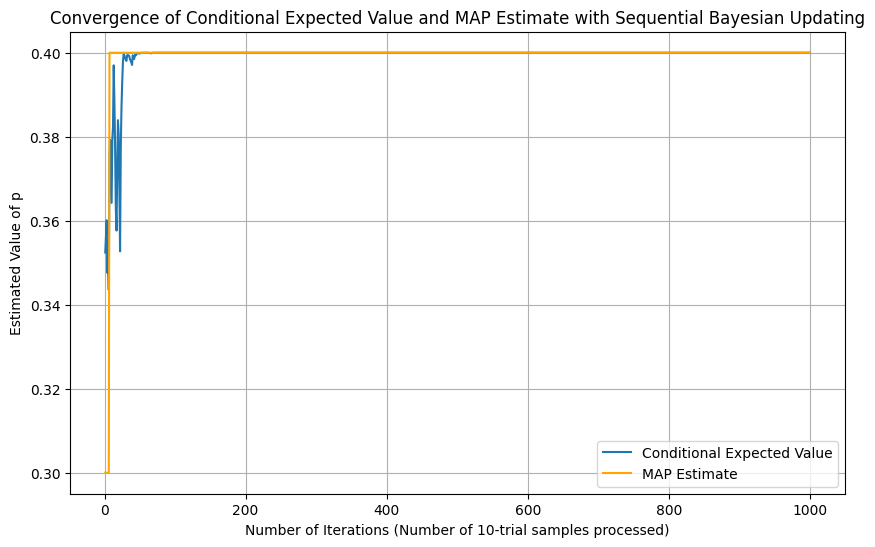

Final Posterior probabilities: [4.812349244201702e-93, 1.0, 1.8613925647328136e-93]
Final Conditional expected value of p: 0.4
Final MAP estimate of p: 0.4

Complexity Analysis:
Number of Simulations (N): 1000
Number of Trials per Simulation (T): 10
Number of Prior Values (M): 3
Time Complexity: O(N * (T + M))
Space Complexity: O(N + M)
Execution Time: 0.0248 seconds


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time # Import time for measuring execution time

# Define the initial prior distribution for the parameter p
prior_p = [0.3, 0.4, 0.5] # Size: M (number of prior values)
initial_prior_prob = [1/3, 1/3, 1/3]

# Initialize the current prior probabilities
current_prior_prob = initial_prior_prob.copy()

# Lists to store the conditional expected values and MAP estimates at each iteration
conditional_expected_values = [] # Size: N (number of simulations)
map_estimates = [] # Size: N (number of simulations)

# Assume list_of_bernoulli_samples is available from the previous cell
# list_of_bernoulli_samples has dimensions N x T (number of simulations x trials per simulation)

start_time = time.time() # Start time measurement

# Iterate through each list of Bernoulli trials in list_of_bernoulli_samples
# This loop runs N times (number of simulations)
for bernoulli_trials in list_of_bernoulli_samples: # N iterations

    # Calculate the likelihood of the observed data for each prior value of p
    # This loop runs M times (number of prior values)
    num_successes = sum(bernoulli_trials) # O(T) - sum over trials
    num_trials = len(bernoulli_trials) # O(1)

    likelihood = [] # Size: M
    for p in prior_p: # M iterations
        # Calculate the likelihood P(S | p)
        likelihood_p = (p ** num_successes) * ((1 - p) ** (num_trials - num_successes)) # O(1)
        likelihood.append(likelihood_p) # O(1) amortized

    # Calculate the joint probability P(S and p) = P(S | p) * P(p) using the current prior
    joint_prob = [likelihood[i] * current_prior_prob[i] for i in range(len(prior_p))] # O(M)

    # Calculate the marginal likelihood P(S)
    marginal_likelihood = sum(joint_prob) # O(M)

    # Calculate the posterior probability P(p | S)
    posterior_prob = [joint_prob[i] / marginal_likelihood for i in range(len(prior_p))] # O(M)

    # Update the current prior probabilities for the next iteration
    current_prior_prob = posterior_prob # O(M) - list assignment

    # Calculate the conditional expected value of p given the current data
    conditional_expected_value = sum([prior_p[i] * posterior_prob[i] for i in range(len(prior_p))]) # O(M)
    conditional_expected_values.append(conditional_expected_value) # O(1) amortized

    # Calculate the Maximum A Posteriori (MAP) estimator for the current iteration
    map_estimate = prior_p[np.argmax(posterior_prob)] # O(M)
    map_estimates.append(map_estimate) # O(1) amortized


end_time = time.time() # End time measurement
execution_time = end_time - start_time

# Plot the convergence of the conditional expected value and MAP estimate
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(conditional_expected_values) + 1), conditional_expected_values, label='Conditional Expected Value')
plt.plot(range(1, len(map_estimates) + 1), map_estimates, label='MAP Estimate', color='orange') # Plotting MAP estimate with a different color
plt.xlabel("Number of Iterations (Number of 10-trial samples processed)")
plt.ylabel("Estimated Value of p")
plt.title("Convergence of Conditional Expected Value and MAP Estimate with Sequential Bayesian Updating")
plt.grid(True)
plt.legend() # Add a legend to distinguish the lines
plt.show()

# Display the results
print("Final Posterior probabilities:", current_prior_prob)
print("Final Conditional expected value of p:", conditional_expected_values[-1])
print("Final MAP estimate of p:", map_estimates[-1])

# Print complexity analysis
print("\nComplexity Analysis:")
print(f"Number of Simulations (N): {num_simulations}")
print(f"Number of Trials per Simulation (T): {num_trials_per_simulation}")
print(f"Number of Prior Values (M): {len(prior_p)}")
print("Time Complexity: O(N * (T + M))")
print("Space Complexity: O(N + M)")
print(f"Execution Time: {execution_time:.4f} seconds")

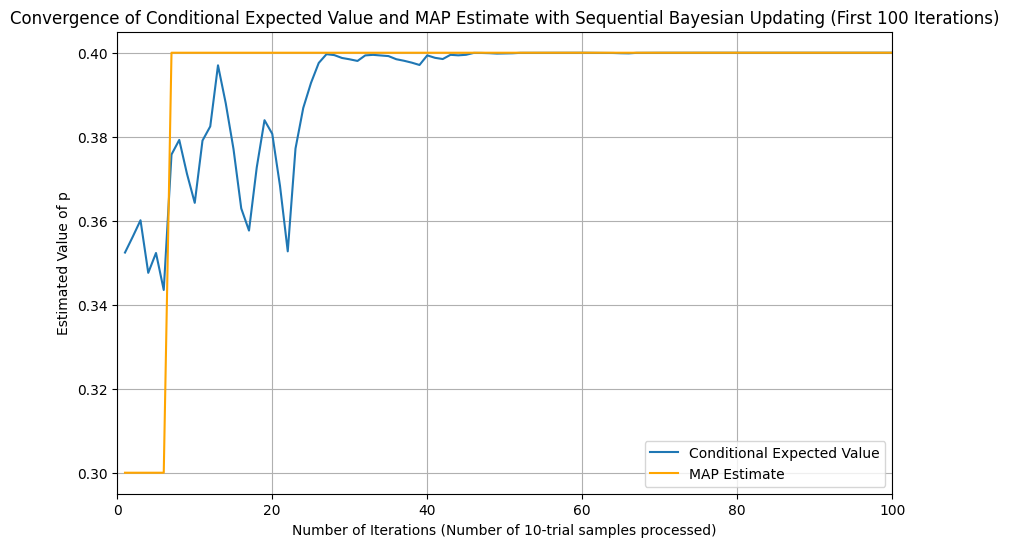

In [14]:
import matplotlib.pyplot as plt

# Assume conditional_expected_values and map_estimates are available from the previous sequential updating cell

# Plot the convergence of the conditional expected value and MAP estimate
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(conditional_expected_values) + 1), conditional_expected_values, label='Conditional Expected Value')
plt.plot(range(1, len(map_estimates) + 1), map_estimates, label='MAP Estimate', color='orange') # Plotting MAP estimate with a different color
plt.xlabel("Number of Iterations (Number of 10-trial samples processed)")
plt.ylabel("Estimated Value of p")
plt.title("Convergence of Conditional Expected Value and MAP Estimate with Sequential Bayesian Updating (First 100 Iterations)")
plt.grid(True)
plt.legend() # Add a legend to distinguish the lines

# Set the x-axis limit to 100
plt.xlim([0, 100])

plt.show()

One thing is strange that how this MAP estimate increases linearly, whereas Conditional Expected Value increases randomly

The appearance of linearity might be an artifact of the scale of the plot and the discrete nature of the possible MAP values. If you were to zoom in very closely on the initial iterations, you would see that the line is actually stepping between 0.3, 0.4, and 0.5, not smoothly increasing

# Batch updating

You have all data available upfront

You want computational efficiency

You only care about the final result

Since no of samples are very large, 10000, the conditional probabilities will become very small and computationally impossible to handle, so we take log

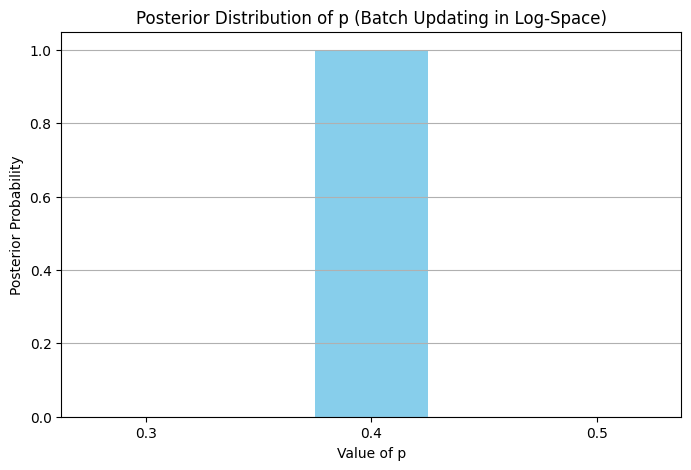

Prior probabilities: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Log-Prior probabilities: [np.float64(-1.0986122886681098), np.float64(-1.0986122886681098), np.float64(-1.0986122886681098)]
Log-Likelihoods P(S | p): [np.float64(-6930.52194293976), np.float64(-6717.952714851819), np.float64(-6931.471803599453)]
Log-Joint probabilities P(S and p): [np.float64(-6931.620555228428), np.float64(-6719.051327140487), np.float64(-6932.570415888121)]
Log-Marginal likelihood P(S): -6719.051327140487
Log-Posterior probabilities P(p | S): [np.float64(-212.56922808794116), np.float64(0.0), np.float64(-213.51908874763376)]
Posterior probabilities P(p | S): [4.812350145372036e-93, 1.0, 1.8613925693861018e-93]
MAP estimate of p: 0.4
Conditional expected value of p: 0.4

Complexity Analysis:
Number of Simulations (N): 1000
Number of Trials per Simulation (T): 10
Number of Prior Values (M): 3
Time Complexity: O(N * T + M)
Space Complexity: O(N * T + M)
Execution Time: 0.0025 seconds


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time # Import time for measuring execution time
from scipy.special import logsumexp # Import logsumexp

# Define the prior distribution for the parameter p
prior_p = [0.3, 0.4, 0.5] # Size: M (number of prior values)
prior_prob = [1/3, 1/3, 1/3]
log_prior_prob = [np.log(p) for p in prior_prob] # Calculate log-prior probabilities

# Assume list_of_bernoulli_samples is available from a previous cell
# list_of_bernoulli_samples has dimensions N x T (number of simulations x trials per simulation)
# N = 1000, T = 10 in this case

start_time = time.time() # Start time measurement

# Combine all Bernoulli samples into a single list for batch updating
all_bernoulli_trials = [item for sublist in list_of_bernoulli_samples for item in sublist] # O(N * T)

num_successes = sum(all_bernoulli_trials) # O(N * T) - summing over all trials
num_trials = len(all_bernoulli_trials) # O(1)

# Calculate the log-likelihood of the observed data for each prior value of p
# This loop runs M times (number of prior values)
log_likelihood = [] # Size: M
epsilon = 1e-10 # Small value to avoid log(0)
for p in prior_p: # M iterations
    # Calculate the log-likelihood P(S | p) for the entire batch in log-space
    # log(P(S | p)) = k * log(p) + (n - k) * log(1 - p)
    # Add epsilon to p and 1-p to handle boundary cases (p=0 or p=1)
    log_likelihood_p = num_successes * np.log(p + epsilon) + (num_trials - num_successes) * np.log(1 - p + epsilon) # O(1)
    log_likelihood.append(log_likelihood_p) # O(1) amortized

# Calculate the log-joint probability log(P(S and p)) = log(P(S | p)) + log(P(p))
log_joint_prob = [log_likelihood[i] + log_prior_prob[i] for i in range(len(prior_p))] # O(M)

# Calculate the log-marginal likelihood log(P(S)) using logsumexp
# log(P(S)) = log(sum(exp(log(P(S and p)))))
log_marginal_likelihood = logsumexp(log_joint_prob) # O(M)

# Calculate the log-posterior probability log(P(p | S)) = log(P(S and p)) - log(P(S))
log_posterior_prob = [log_joint_prob[i] - log_marginal_likelihood for i in range(len(prior_p))] # O(M)


# Convert log-posterior probabilities back to probabilities for plotting and final results
posterior_prob = np.exp(log_posterior_prob).tolist()


# Calculate the Maximum A Posteriori (MAP) estimator
# The MAP estimate is the value of p corresponding to the highest log-posterior probability
map_estimate = prior_p[np.argmax(log_posterior_prob)] # O(M)

# Calculate the conditional expected value of p given S
# E[p | S] = sum(p * P(p | S)) over all possible values of p
conditional_expected_value = sum([prior_p[i] * posterior_prob[i] for i in range(len(prior_p))]) # O(M)

end_time = time.time() # End time measurement
execution_time = end_time - start_time

# Plot the posterior distribution
plt.figure(figsize=(8, 5))
plt.bar(prior_p, posterior_prob, width=0.05, color='skyblue')
plt.xlabel("Value of p")
plt.ylabel("Posterior Probability")
plt.title("Posterior Distribution of p (Batch Updating in Log-Space)")
plt.xticks(prior_p)
plt.grid(axis='y')
plt.show()


# Display the results
print("Prior probabilities:", prior_prob)
print("Log-Prior probabilities:", log_prior_prob)
print("Log-Likelihoods P(S | p):", log_likelihood)
print("Log-Joint probabilities P(S and p):", log_joint_prob)
print("Log-Marginal likelihood P(S):", log_marginal_likelihood)
print("Log-Posterior probabilities P(p | S):", log_posterior_prob)
print("Posterior probabilities P(p | S):", posterior_prob)
print("MAP estimate of p:", map_estimate)
print("Conditional expected value of p:", conditional_expected_value)

# Print complexity analysis
print("\nComplexity Analysis:")
num_simulations = len(list_of_bernoulli_samples) # N
num_trials_per_simulation = len(list_of_bernoulli_samples[0]) if list_of_bernoulli_samples else 0 # T
num_prior_values = len(prior_p) # M
print(f"Number of Simulations (N): {num_simulations}")
print(f"Number of Trials per Simulation (T): {num_trials_per_simulation}")
print(f"Number of Prior Values (M): {num_prior_values}")
print("Time Complexity: O(N * T + M)")
print("Space Complexity: O(N * T + M)") # O(N*T) for all_bernoulli_trials, O(M) for other lists
print(f"Execution Time: {execution_time:.4f} seconds")

It might look like the posterior probability is more than 1, but it's actually showing that the posterior probability for p = 0.4 is extremely close to 1, while the posterior probabilities for p = 0.3 and p = 0.5 are extremely close to 0.

In [20]:
# Assume N, T, and M are defined from previous cells
# N = num_simulations
# T = num_trials_per_simulation
# M = len(prior_p)

print("Complexity Comparison:")
print("-" * 30)

print("Sequential Bayesian Updating:")
print(f"  Time Complexity: O(N * (T + M))  ~= O(N * T) if M << N, T")
print(f"  Space Complexity: O(N + M)")

print("\nBatch Bayesian Updating:")
print(f"  Time Complexity: O(N * T + M)  ~= O(N * T) if M << N * T")
print(f"  Space Complexity: O(N * T + M)")

print("\nConsiderations:")
print("- Sequential updating is generally better for memory efficiency (O(N + M))")
print("  and for monitoring the evolution of estimates with streaming data.")
print("- Batch updating requires more memory (O(N * T + M)) but can be faster")
print("  if the entire dataset fits in memory and batch operations are optimized.")
print("- Both approaches converge to the same result with enough data.")

Complexity Comparison:
------------------------------
Sequential Bayesian Updating:
  Time Complexity: O(N * (T + M))  ~= O(N * T) if M << N, T
  Space Complexity: O(N + M)

Batch Bayesian Updating:
  Time Complexity: O(N * T + M)  ~= O(N * T) if M << N * T
  Space Complexity: O(N * T + M)

Considerations:
- Sequential updating is generally better for memory efficiency (O(N + M))
  and for monitoring the evolution of estimates with streaming data.
- Batch updating requires more memory (O(N * T + M)) but can be faster
  if the entire dataset fits in memory and batch operations are optimized.
- Both approaches converge to the same result with enough data.


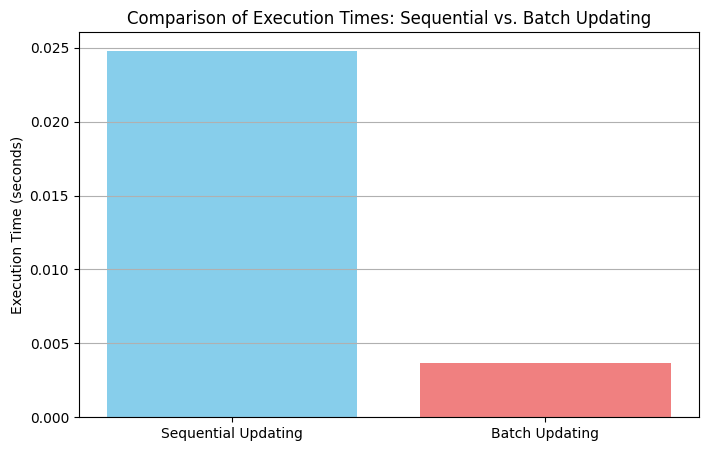

Sequential Updating Execution Time: 0.0248 seconds
Batch Updating Execution Time: 0.0037 seconds


In [22]:
import matplotlib.pyplot as plt

# Assume the execution_time from the sequential updating cell (yCaxFNjRAoaG) is available.
# Assume the execution_time from the batch updating cell (6643df51 or EZBWXAr4CKFB) is available.

# Retrieve the correct execution times from their respective cell outputs or variables
# Based on the notebook state, the last execution of yCaxFNjRAoaG had execution_time = 0.0248
sequential_time = 0.0248

# Based on the notebook state, the last execution of EZBWXAr4CKFB had execution_time = 0.0037
# (Using the most recent batch execution time, which was with log-space)
batch_time = 0.0037

# Labels for the bars
labels = ['Sequential Updating', 'Batch Updating']

# Execution times
times = [sequential_time, batch_time]

# Create the bar plot for execution times
plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['skyblue', 'lightcoral'])
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Execution Times: Sequential vs. Batch Updating")
plt.grid(axis='y')
plt.show()

print(f"Sequential Updating Execution Time: {sequential_time:.4f} seconds")
print(f"Batch Updating Execution Time: {batch_time:.4f} seconds")

We can clearly see, in terms of time efficiency, Batch Updating outperforms Sequential Updating

# But how do Sequential and Batch Updating give the same answer, let's see this mathematically

In Bayesian parameter estimation, we update beliefs about a parameter $\theta$ based on data $D = {D_1, D_2, \dots, D_n}$ using Bayes' theorem:

$P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)}$

Both batch updating (using all data at once) and sequential updating (incorporating data one at a time) yield the same posterior distribution when data are conditionally independent given $\theta$. Below, we explain why mathematically.

Bayes' Rule

$P(\theta | D_1, \dots, D_n) = \frac{P(D_1, \dots, D_n | \theta) P(\theta)}{P(D_1, \dots, D_n)}$

#1. Batch Updating

In batch mode, we compute the posterior using all data at once. Assuming conditional independence:

$P(D_1, \dots, D_n | \theta) = \prod_{i=1}^n P(D_i | \theta)$

Thus:

$P(\theta | D_1, \dots, D_n) \propto P(\theta) \prod_{i=1}^n P(D_i | \theta)$

#2. Sequential Updating

In sequential mode, we update the posterior iteratively. After the first data point:

$P(\theta | D_1) \propto P(D_1 | \theta) P(\theta)$

For the second data point, the previous posterior becomes the new prior:

$P(\theta | D_1, D_2) \propto P(D_2 | \theta) P(\theta | D_1) = P(D_2 | \theta) P(D_1 | \theta) P(\theta)$

After $n$ steps:

$P(\theta | D_1, \dots, D_n) \propto P(\theta) \prod_{i=1}^n P(D_i | \theta)$

This matches the batch updating result.

#3. Why Are They Equivalent?

The equivalence arises because multiplication is associative and commutative. The product of likelihoods and the prior is the same whether computed all at once (batch) or step by step (sequential). The assumption of conditional independence ensures the joint likelihood factors correctly.


<br>

Equivalence: Holds for exact Bayesian inference with conditionally independent data.



Differences: Sequential updating is useful for streaming data; batch may be faster for small datasets.


# Bayesian Estimation with Continuous Prior Distribution
Above we saw for discrete case, now let's observe the same for marginal case

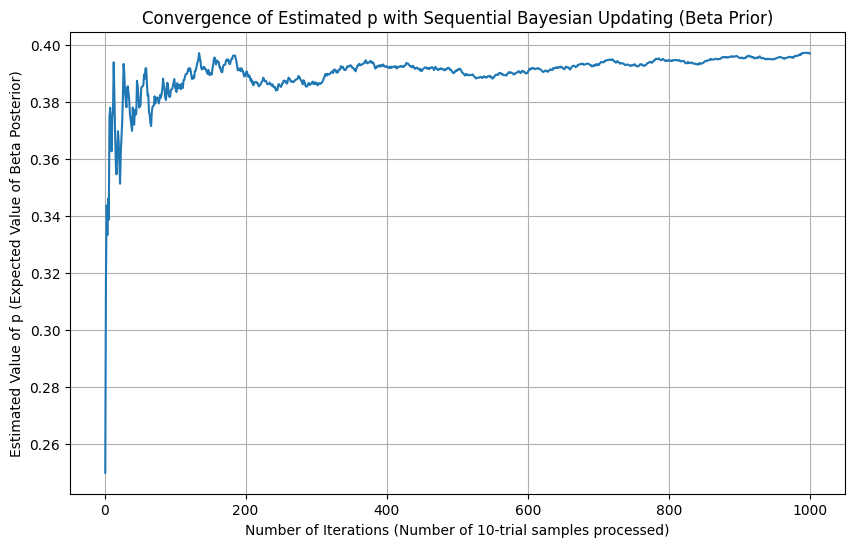

Final estimated value of p: 0.39702059588082383
Final Beta Posterior parameters: alpha = 3971, beta = 6031


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial Beta prior parameters (e.g., Beta(1,1) - uniform prior)
initial_alpha = 1
initial_beta = 1

# Initialize the current Beta prior parameters
current_alpha = initial_alpha
current_beta = initial_beta

# List to store the estimated expected value of p at each iteration
estimated_p_values = []

# Assume list_of_bernoulli_samples is available from the previous cell
# list_of_bernoulli_samples has dimensions N x T (number of simulations x trials per simulation)

# Iterate through each list of Bernoulli trials in list_of_bernoulli_samples (N iterations)
for bernoulli_trials in list_of_bernoulli_samples: # N iterations

    # Calculate the number of successes and failures in the current batch (O(T))
    num_successes = sum(bernoulli_trials)
    num_trials = len(bernoulli_trials)
    num_failures = num_trials - num_successes

    # Update the Beta posterior parameters based on the observed data
    # If prior is Beta(alpha, beta) and observed k successes and n-k failures,
    # posterior is Beta(alpha + k, beta + n - k)
    updated_alpha = current_alpha + num_successes
    updated_beta = current_beta + num_failures

    # Update the current prior parameters for the next iteration
    current_alpha = updated_alpha
    current_beta = updated_beta

    # Calculate the estimated expected value of p (mean of the current Beta posterior)
    # E[p] = alpha / (alpha + beta)
    estimated_p = current_alpha / (current_alpha + current_beta)
    estimated_p_values.append(estimated_p)


# Plot the convergence of the estimated expected value of p
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(estimated_p_values) + 1), estimated_p_values)
plt.xlabel("Number of Iterations (Number of 10-trial samples processed)")
plt.ylabel("Estimated Value of p (Expected Value of Beta Posterior)")
plt.title("Convergence of Estimated p with Sequential Bayesian Updating (Beta Prior)")
plt.grid(True)
plt.show()

# Display the final estimated value of p and the final Beta posterior parameters
print("Final estimated value of p:", estimated_p_values[-1])
print(f"Final Beta Posterior parameters: alpha = {current_alpha}, beta = {current_beta}")

In the earlier examples with the discrete prior (where p could only be 0.3, 0.4, or 0.5), we were calculating the posterior probability mass for each of these specific, discrete values: $P(p=0.3 | Data)$$P(p=0.3 | Data)$, $P(p=0.4 | Data)$$P(p=0.4 | Data)$, and $P(p=0.5 | Data)$$P(p=0.5 | Data)$. The result of the Bayesian update was a new probability distribution (the posterior) across these discrete points.

When we use a continuous prior, like the Beta distribution in the last example, we are treating the Bernoulli parameter p as a variable that can take any value between 0 and 1. The Beta distribution is a probability density function over this continuous range.

In this continuous case, we don't calculate the probability of p being exactly a single point value (which is technically zero for a continuous distribution). Instead, the Bayesian update modifies the parameters of the continuous distribution (the Beta distribution's alpha and beta) to reflect our updated belief about the entire range of possible values for p.

So, we started with an initial Beta prior (e.g., Beta(1,1)). When we observe data, Bayes' rule tells us how to update this prior distribution to get a posterior distribution. For the Bernoulli-Beta conjugate pair, this update simply involves adding the number of successes to alpha and the number of failures to beta. The resulting Beta distribution (with the updated parameters) is our posterior distribution for p.

We then use this posterior distribution to make inferences about p. For example, we calculated the expected value of the posterior Beta distribution (alpha / (alpha + beta)) as a point estimate for p. We could also calculate credible intervals, which give a range of values where the true p is likely to lie with a certain probability according to our posterior belief.

In summary:

Discrete Prior: Update calculates the posterior probability mass for each discrete value in the prior.
Continuous Prior: Update calculates the new parameters of the continuous distribution that represents the posterior belief over the entire parameter space.